# This notebook visualizes data from a project for steakholders. They were interested in seing the progress of the project. The project was a migration of 48 shared folders. 

P.S: They particulary asked for a pie chart ... which I hate!

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
#import data
data = pd.read_csv('./data/actuals.csv')
data

,Dates,Estimates,Actuals,status
0,19-Apr,2.20,3.11,done
1,3-May,2.33,3.00,done
2,17-May,3.55,3.57,done
3,31-May,3.33,4.66,done
4,14-Jun,4.11,4.84,done
5,28-Jun,3.78,5.45,done
6,12-Jul,6.71,8.21,done
7,26-Jul,8.64,0.00,canceled
8,9-Aug,3.84,3.69,done
9,23-Aug,18.40,0.00,canceled


In [3]:
#generate additional columns for the cumulative plot
def estimates_for_cum(row):
    if row['status']=='pending(cancel)':
        return 0
    elif row['status']=='canceled (2nd time)':
        return 0
    elif row['status']=='done (rescheduled)':
        return 0
    else:
        return row['Estimates']


data['estimates_for_cum'] = data.apply(estimates_for_cum,1)
data['cumulative_estimates'] = data['estimates_for_cum'].cumsum()
data['cumulative_actuals'] = data['Actuals'].cumsum()

In [4]:
#check data
data

,Dates,Estimates,Actuals,status,estimates_for_cum,cumulative_estimates,cumulative_actuals
0,19-Apr,2.20,3.11,done,2.20,2.20,3.11
1,3-May,2.33,3.00,done,2.33,4.53,6.11
2,17-May,3.55,3.57,done,3.55,8.08,9.68
3,31-May,3.33,4.66,done,3.33,11.41,14.34
4,14-Jun,4.11,4.84,done,4.11,15.52,19.18
5,28-Jun,3.78,5.45,done,3.78,19.30,24.63
6,12-Jul,6.71,8.21,done,6.71,26.01,32.84
7,26-Jul,8.64,0.00,canceled,8.64,34.65,32.84
8,9-Aug,3.84,3.69,done,3.84,38.49,36.53
9,23-Aug,18.40,0.00,canceled,18.40,56.89,36.53


(<matplotlib.patches.Rectangle object at 0x0000026875F12D30>, <matplotlib.patches.Rectangle object at 0x0000026876456B70>)


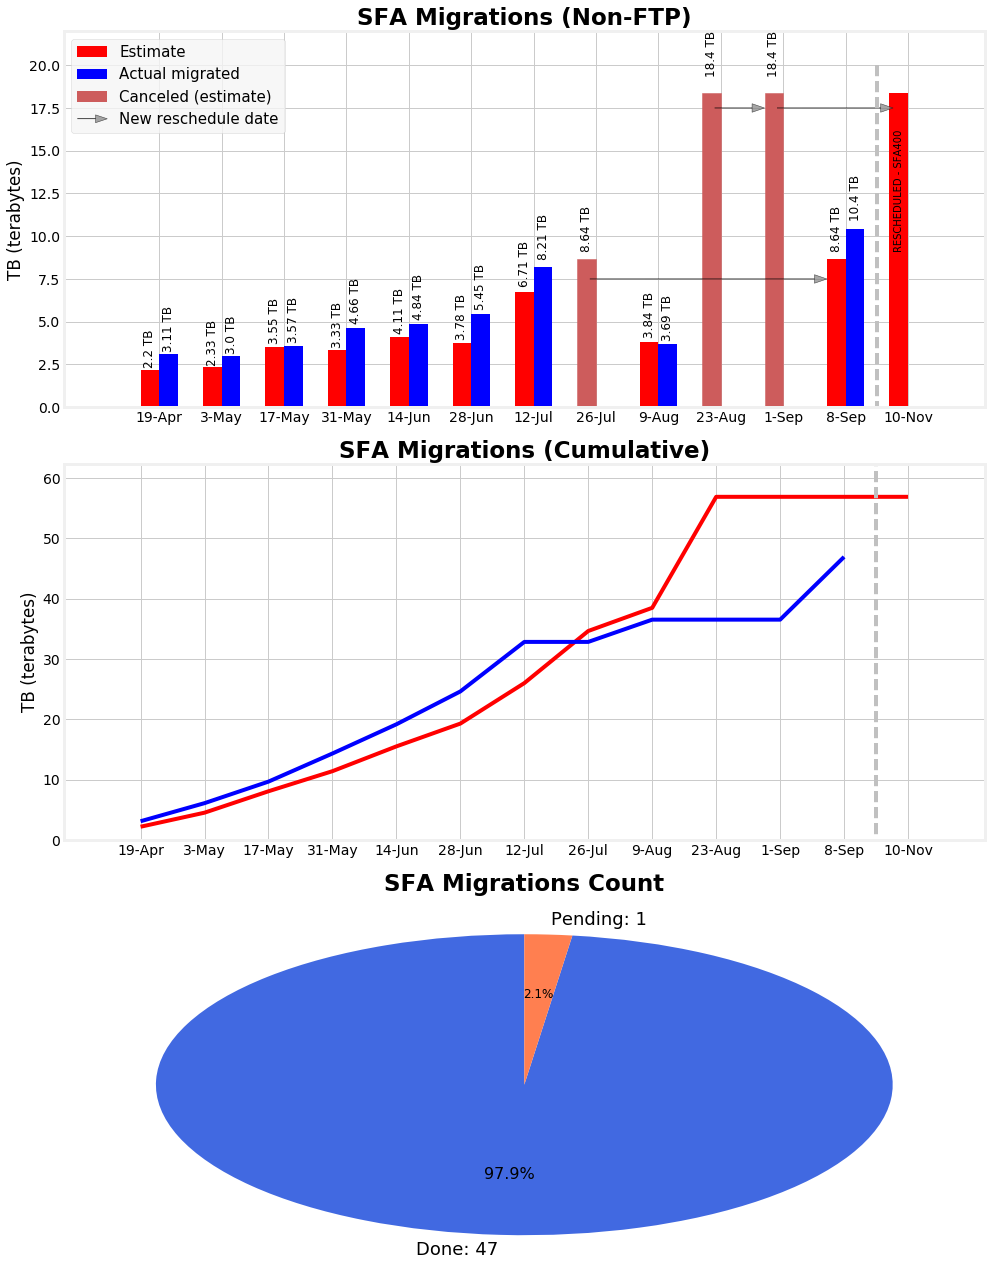

In [48]:
plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = 'white'

# create figure
fig = plt.figure(figsize=(40,18),facecolor='white')

# get index for canceled dates
canceled =  data.index[(data.status == 'canceled') | (data.status == 'canceled (2nd time)')].tolist()

# ------------------ Bar char to compare estimates and actuals (showing cancelations and reschedules)
ax1 = plt.subplot2grid((3,3), (0, 0))
bar_estimate = ax1.bar(data.index-0.15, data.Estimates, color='r', width=0.3)
bar_actual = ax1.bar(data.index+0.15, data.Actuals, color='b', width=0.3)
ax1.set(ylabel='TB (terabytes)', title='SFA Migrations',xticks=data.index)
plt.title("SFA Migrations (Non-FTP)", fontweight = 'bold', size=23 )
ax1.ticklabel_format(useOffset=True)


#color cancelations
for cancel in canceled:
    bar_estimate[cancel].set_color('indianred')

#label all bars
def autolabel_estimate(rects, total_cancel):
    dates_cancel = data.Dates[data.status == 'canceled'].tolist()
    total_cancel = len(dates_cancel)
    rects_cancel = rects[-total_cancel:]
    print(rects_cancel)
    # attach some text labels
    rects1 = rects[:-total_cancel+1]
    for rect in rects1:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.05*height, str(float(height))+' TB',ha='center',
                 va='bottom', size=12, rotation=90)
    #cancelations    
    #date_index=total_cancel-1
    #for rect in rects_cancel:
    #    height = rect.get_height()
    ax1.text(rects[-1].get_x() + rects[-1].get_width()/2., 1.05*height, "RESCHEDULED - SFA400",ha='center', va='bottom',
             size=10, rotation=90)
    #date_index-=1
        
def autolabel_actual(rects):
    # attach some text labels
    rects = rects[:-1]
    for rect in rects:
        height = rect.get_height()
        if float(height) !=0:
            ax1.text(rect.get_x() + rect.get_width()/2., 1.05*height, str(float(height))+' TB',ha='center',
                     va='bottom', size=12, rotation=90)

autolabel_estimate(bar_estimate,len(canceled))
autolabel_actual(bar_actual)

arr = ax1.arrow(6.9, 7.5, 3.6, 0, head_width=0.5, head_length=0.2, fc='k', ec='k', color='grey', alpha=0.7,label='Reschedule date')
arr.set_facecolor('grey')
arr = ax1.arrow(8.9, 17.5, 0.6, 0, head_width=0.5, head_length=0.2, fc='k', ec='k', color='grey', alpha=0.7)
arr.set_facecolor('grey')
arr = ax1.arrow(9.9, 17.5, 1.66, 0, head_width=0.5, head_length=0.2, fc='k', ec='k', color='grey', alpha=0.7)
arr.set_facecolor('grey')




from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

def make_legend_arrow(legend, orig_handle,
                      xdescent, ydescent,
                      width, height, fontsize):
    p = mpatches.FancyArrow(0, 0.5*height, width, 0, length_includes_head=True, head_width=0.75*height )
    return p

#legend
extra = Rectangle((0, 0), 1, 1, fc='indianred', fill=True, edgecolor='none', linewidth=0)
legend = ax1.legend([bar_estimate, bar_actual,extra,arr], ("Estimate", "Actual migrated","Canceled (estimate)","New reschedule date"),
                    loc=2,
                    prop={'size':15},
                    handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow)})

legend.get_frame().set_facecolor('whitesmoke')



# line of time
ax1.plot((11.5,11.5),(20, 0) ,'--',c='silver')
plt.xticks(data.index,data.Dates)
plt.margins(0.1)
#plt.tight_layout()


# --------------------- Cumulative

ax2 = plt.subplot2grid((3,3), (1, 0))
ax2.plot(data.cumulative_estimates,color='r')
ax2.plot(data.cumulative_actuals,color='b')
ax2.ticklabel_format(useOffset=True)
ax2.set(ylabel='TB (terabytes)', title='SFA Migrations (Cumulative)',xticks=data.index)
plt.title("SFA Migrations (Cumulative)", fontweight = 'bold', size=23 )
plt.xticks(data.index,data.Dates)
plt.margins(0.1)
plt.ylim(0)
# line of time
ax2.plot((11.5,11.5),(85, 0) ,'--',c='silver')
#plt.tight_layout()


# --------------------- Pie chart Count

ax3 = plt.subplot2grid((3,3), (2, 0))
sizes=[47,1]
patches, texts, autotexts = ax3.pie(sizes, labels=['Done: '+str(sizes[0]), 'Pending: '+str(sizes[1])],
        shadow=False,startangle=90, colors=['royalblue','coral'],autopct='%1.1f%%')

texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
autotexts[0].set_fontsize(16)
autotexts[1].set_fontsize(12)
plt.title("SFA Migrations Count", fontweight = 'bold', size=23 )
plt.margins(0.1)
plt.tight_layout()

plt.savefig('.\\images\\migration_progress.png',facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')
plt.show()